In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import codecs
import csv



In [ ]:
# f = open('.\\chinavis2018挑战一数据\\2017-11-0'+str(1)+'\\weblog.csv')
df = pd.DataFrame()

for i in range(1, 31):
    f = codecs.open('.\\chinavis2018挑战一数据\\2017-11-' + '%02d' % i + '\\weblog.csv', mode='r',
                    encoding='utf-8', errors='ignore')
    tmp = pd.read_csv(f, header=0)
    print(tmp.shape)
    df = df.append(tmp, ignore_index=True)

print(df.shape)


In [2]:
import json
ip_to_id_dict = json.load(open('ip_to_id_dict.json', 'r'))
id_to_idx_dict = {}
idx_to_id_dict = {}

for (i, (ip, id)) in enumerate(ip_to_id_dict.items()):
    id_to_idx_dict[id] = i
    idx_to_id_dict[i] = id

print(len(ip_to_id_dict))
# print(id_to_idx_dict)
# print(idx_to_id_dict)

299


In [3]:
import numpy as np
print(df['dip'].unique().shape)
# for i in range(len(df)):
#     if df['dip'][i] in ip_to_id_dict.keys():
#         print(df['dip'][i])

web_dips = df['dip'].value_counts()
dip_to_idx_dict = {}
idx_to_dip_dict = {}
for i, dip in enumerate(web_dips.index):
#     print(i, dip)
    dip_to_idx_dict[dip] = i
    idx_to_dip_dict[i] = dip
# print(dip_to_idx_dict, idx_to_dip_dict)

web_counts_per_id_per_dip = np.zeros(shape=(len(id_to_idx_dict), len(web_dips)))

for i in range(len(df)):
    s_idx = id_to_idx_dict[ip_to_id_dict[df['sip'][i]]]
    d_idx = dip_to_idx_dict[df['dip'][i]]
    web_counts_per_id_per_dip[s_idx, d_idx] += 1
web_counts_per_id_per_dip

(345,)


array([[153.,  67.,   0., ...,   0.,   0.,   0.],
       [249., 119.,   0., ...,   0.,   0.,   0.],
       [298., 117.,   0., ...,   0.,   0.,   0.],
       ...,
       [ 79.,  43.,  46., ...,   0.,   0.,   0.],
       [ 71.,  45.,  44., ...,   0.,   0.,   0.],
       [ 79.,  26.,   0., ...,   0.,   0.,   0.]])

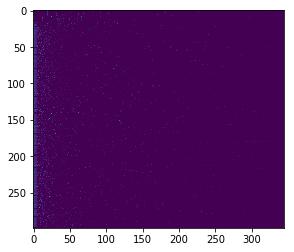

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(web_counts_per_id_per_dip)


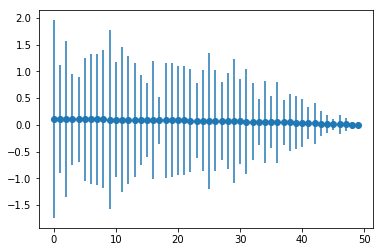

In [5]:
web_counts_per_dip_mean = np.mean(web_counts_per_id_per_dip, axis=0)
# web_counts_per_dip_std = np.max(web_counts_per_id_per_dip, axis=0) - np.min(web_counts_per_id_per_dip, axis=0)
web_counts_per_dip_std = np.std(web_counts_per_id_per_dip, axis=0) #/ np.sqrt(len(web_counts_per_id_per_dip))
web_counts_per_dip_max = np.max(web_counts_per_id_per_dip, axis=0)

plt.errorbar(range(50), web_counts_per_dip_mean[-50:], web_counts_per_dip_std[-50:], fmt='o')
# plt.plot(range(50), web_counts_per_dip_max[-50:])
plt.show()

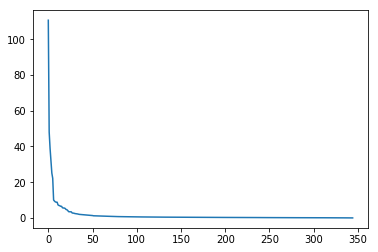

In [6]:
plt.plot(range(len(web_counts_per_dip_mean)), web_counts_per_dip_mean)

In [ ]:
ip_to_id_dict.items()

In [ ]:
dip_to_host_dict = {}
for i in range(len(df)):
    if not pd.isnull(df['host'][i]):
        dip_to_host_dict[df['dip'][i]] = df['host'][i]
print(dip_to_host_dict.items())

In [23]:
a_web_counts = web_counts_per_id_per_dip[:, :-10]
b_web_counts = web_counts_per_id_per_dip[:, -10:]
list_web_counts = np.concatenate((a_web_counts, b_web_counts), axis=1).tolist()
list_web_counts.insert(0,
                       [dip_to_host_dict[idx_to_dip_dict[i]] 
                        if idx_to_dip_dict[i] in dip_to_host_dict.keys()
                        else idx_to_dip_dict[i]
                        for i in range(web_counts_per_id_per_dip.shape[1])])
# list_web_counts = np.array(list_web_counts)

file_path = '.\\webpage\\web_counts.json'
with open(file_path, 'w') as f:
    wr = csv.writer(f)
    wr.writerows(list_web_counts)
# np.savetxt(fname=file_path, X=list_web_counts,delimiter=',',encoding='utf-8')
# json.dump(list_web_counts, codecs.open(file_path, 'w', encoding='utf-8'), separators=(',', ':'), sort_keys=True, indent=4)

In [42]:
dip_to_host_dict[idx_to_dip_dict[269]]

'http://www.kanzhun.com/'

In [ ]:
cum_sum = pd.value_counts(df['dip']).cumsum()

print(len(cum_sum))

plt.plot(range(len(cum_sum)), cum_sum)
plt.hlines(cum_sum[-1], 0, len(cum_sum))
plt.show()